In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

Вашою основною задачею буде побудова моделі для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в рызних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних з сайту [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing). Дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних можна [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link) .

### Опис змінних

| Змінна       | Опис                                                                                       | Тип даних                                 | Значення                         |
|--------------|--------------------------------------------------------------------------------------------|-------------------------------------------|----------------------------------|
| **age**      | Вік клієнта                                                                                | Числова                                   | Цілі числа                       |
| **job**      | Тип роботи                                                                                 | Категоріальна                             | "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services" |
| **marital**  | Сімейний стан                                                                              | Категоріальна                             | "married", "divorced", "single"  |
| **education**| Рівень освіти                                                                              | Категоріальна                             | "unknown", "secondary", "primary", "tertiary" |
| **default**  | Наявність кредиту в дефолті                                                                | Бінарна                                   | "yes", "no"                      |
| **balance**  | Середній річний баланс в євро                                                              | Числова                                   | Цілі числа                       |
| **housing**  | Наявність житлового кредиту                                                                | Бінарна                                   | "yes", "no"                      |
| **loan**     | Наявність особистого кредиту                                                               | Бінарна                                   | "yes", "no"                      |
| **contact**  | Тип комунікації при останньому контакті                                                    | Категоріальна                             | "unknown", "telephone", "cellular"|
| **day**      | День останнього контакту в місяці                                                          | Числова                                   | Цілі числа                       |
| **month**    | Місяць останнього контакту в році                                                          | Категоріальна                             | "jan", "feb", "mar", ..., "nov", "dec" |
| **duration** | Тривалість останнього контакту в секундах                                                  | Числова                                   | Цілі числа                       |
| **campaign** | Кількість контактів, здійснених під час цієї кампанії для цього клієнта (включає останній контакт) | Числова                                   | Цілі числа                       |
| **pdays**    | Кількість днів, що пройшли з моменту останнього контакту клієнта з попередньої кампанії    | Числова                                   | Цілі числа; -1 означає, що клієнт не контактувався раніше |
| **previous** | Кількість контактів, здійснених до цієї кампанії для цього клієнта                         | Числова                                   | Цілі числа                       |
| **poutcome** | Результат попередньої маркетингової кампанії                                               | Категоріальна                             | "unknown", "other", "failure", "success" |
| **y**        | Чи підписав клієнт строковий депозит                                                      | Бінарна (цільова змінна)                  | "yes", "no"                      |

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [62]:
raw_df = pd.read_csv('./bank-additional-full.csv', sep=";")
raw_df = raw_df[-raw_df.duplicated()]

raw_df = raw_df.reset_index()

# Data Analysis

Data is allready filled with values, and has no null/empty cells

In [14]:
print(raw_df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860    

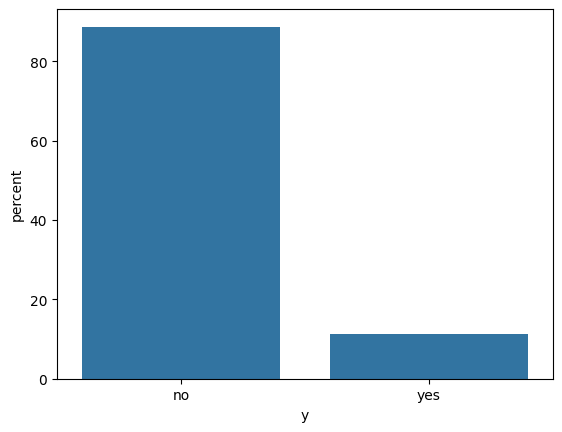

In [69]:
# Summary statistics for numerical columns
print(raw_df.describe())

# Balance of target variable
print((raw_df['y'].value_counts() / len(raw_df['y'])) * 100 )

# Count plot for target variable
sns.countplot(x='y', data=raw_df, stat="percent")
plt.show()



We can see we have inbalanced target classes

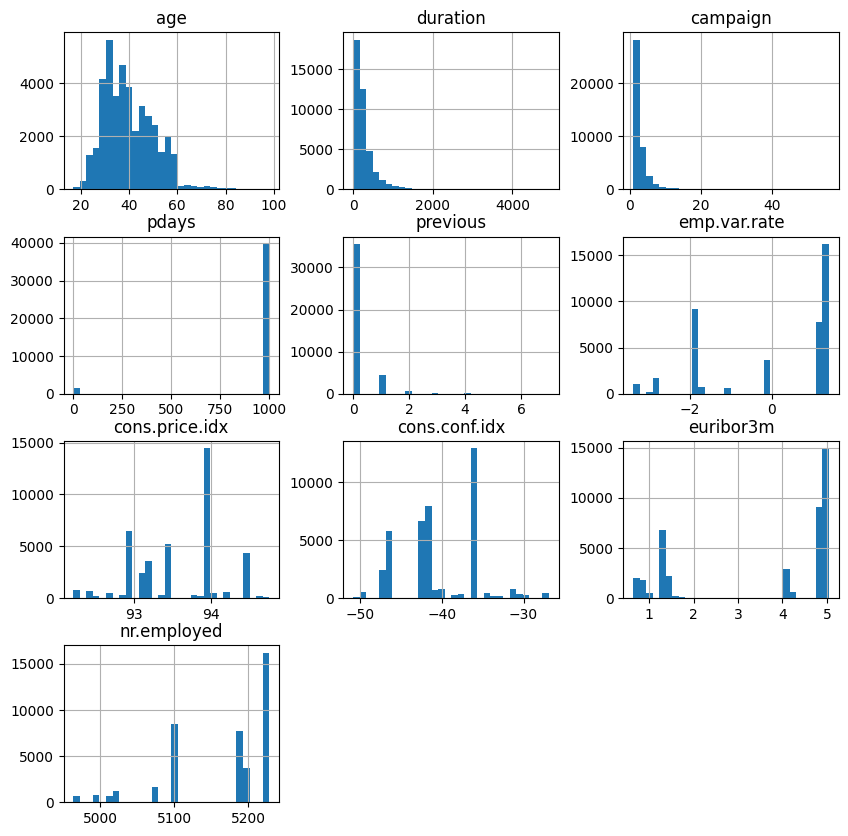

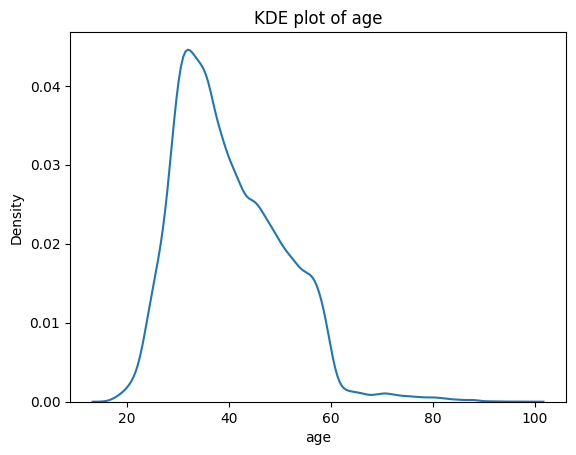

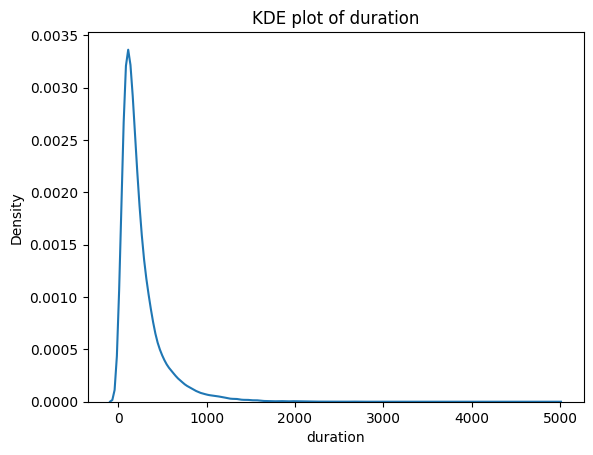

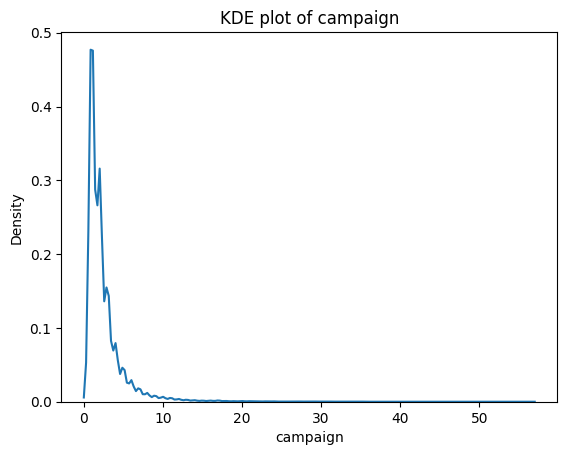

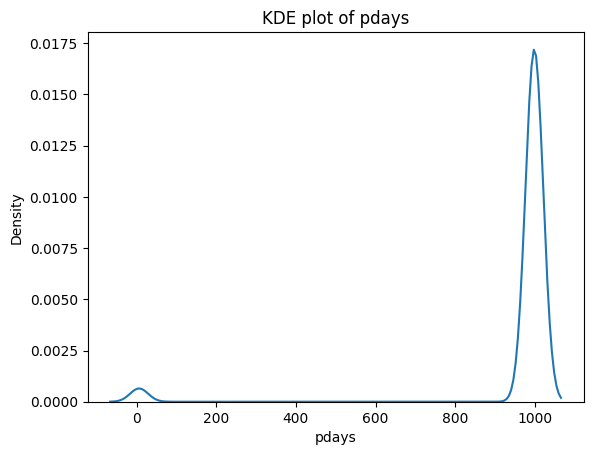

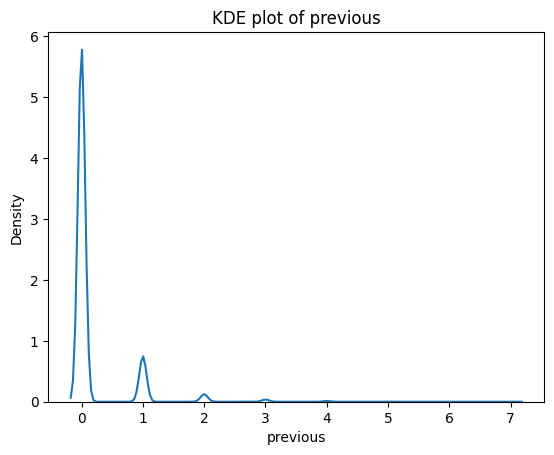

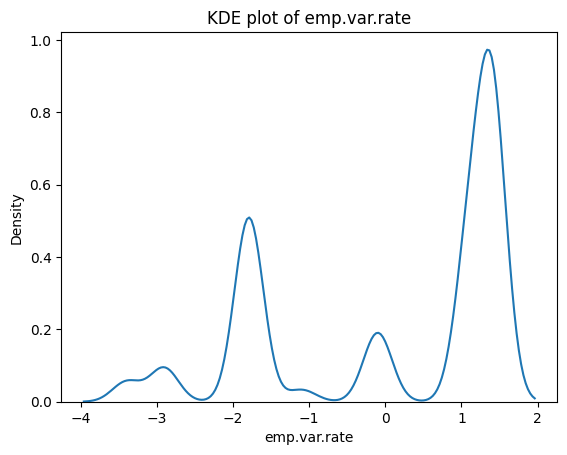

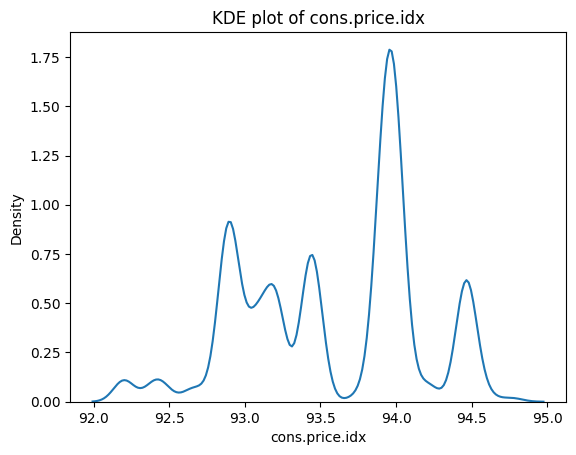

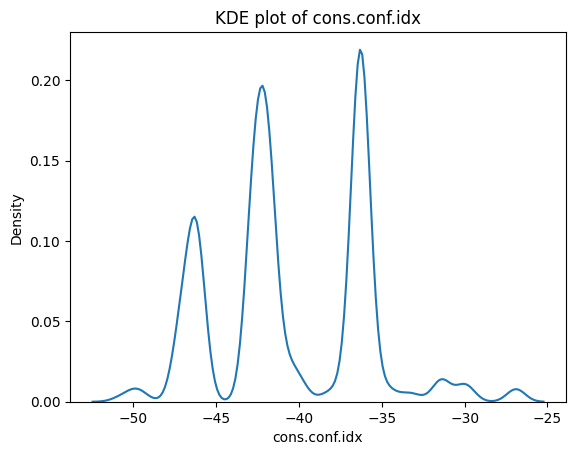

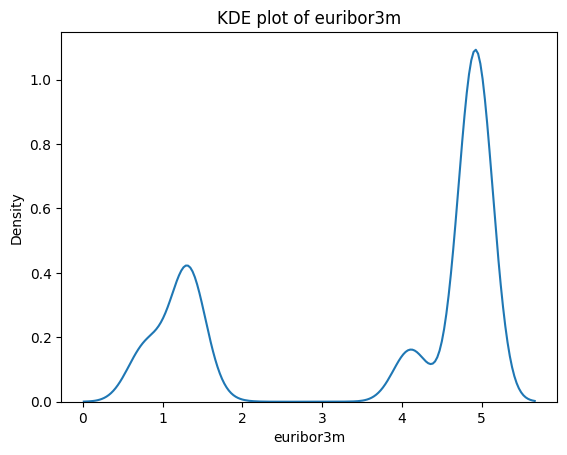

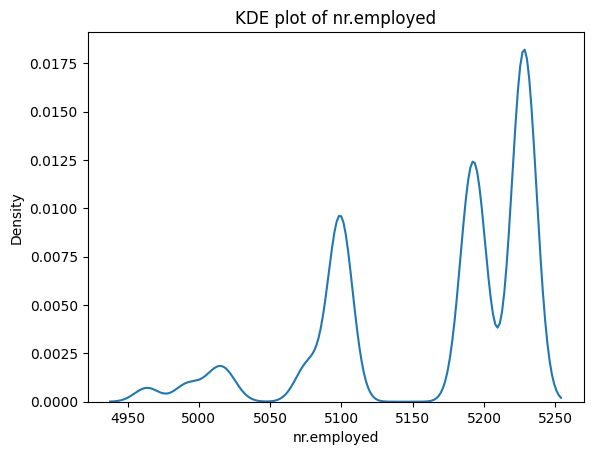

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
raw_df.hist(figsize=(10, 10), bins=30)
plt.show()

# KDE plots
for column in raw_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(raw_df[column])
    plt.title(f'KDE plot of {column}')
    plt.show()


For some values we can see untypical distributions

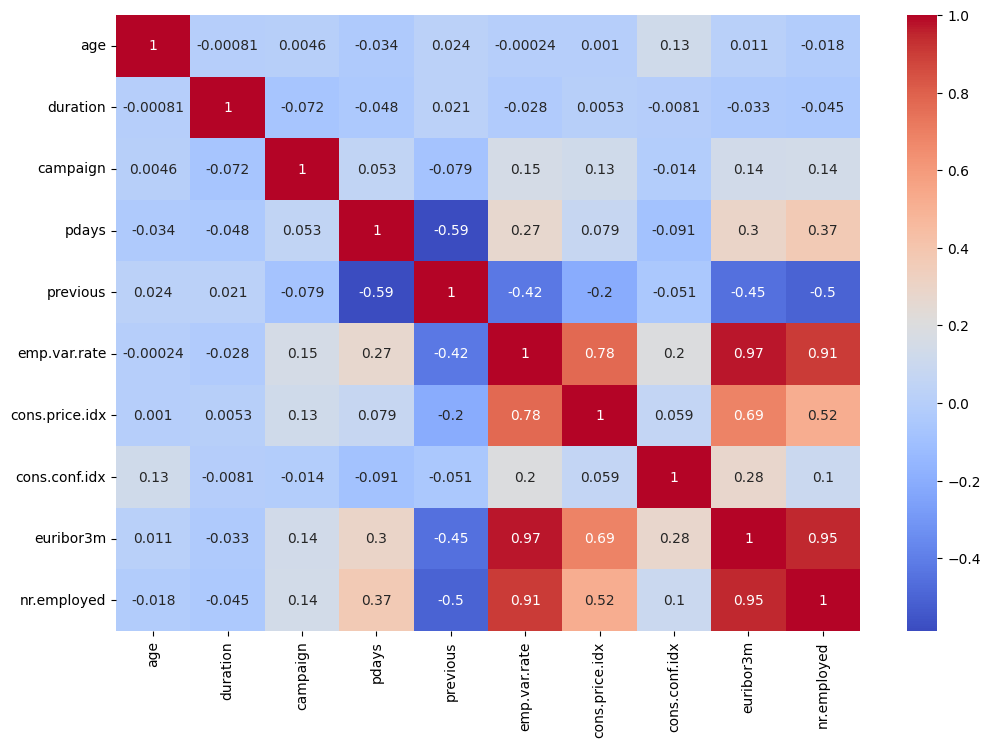

In [25]:
# Correlation matrix
corr_matrix = raw_df.select_dtypes(['float64', 'int64']).corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [58]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

corr_pairs = corr_matrix.where(mask).stack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

filtered_pairs = corr_pairs[np.abs(corr_pairs['Correlation']) > 0.5]

filtered_pairs

,Variable 1,Variable 2,Correlation
24,pdays,previous,-0.587508
34,previous,nr.employed,-0.501411
35,emp.var.rate,cons.price.idx,0.775293
37,emp.var.rate,euribor3m,0.972244
38,emp.var.rate,nr.employed,0.906949
40,cons.price.idx,euribor3m,0.688180
41,cons.price.idx,nr.employed,0.521945
44,euribor3m,nr.employed,0.945146


What is really good, we can see some correlation in data. We can see that ther are a couple of pairs that have correlation more than 0.5

Batch 1: Columns ['age', 'duration', 'campaign', 'pdays', 'previous', 'y']


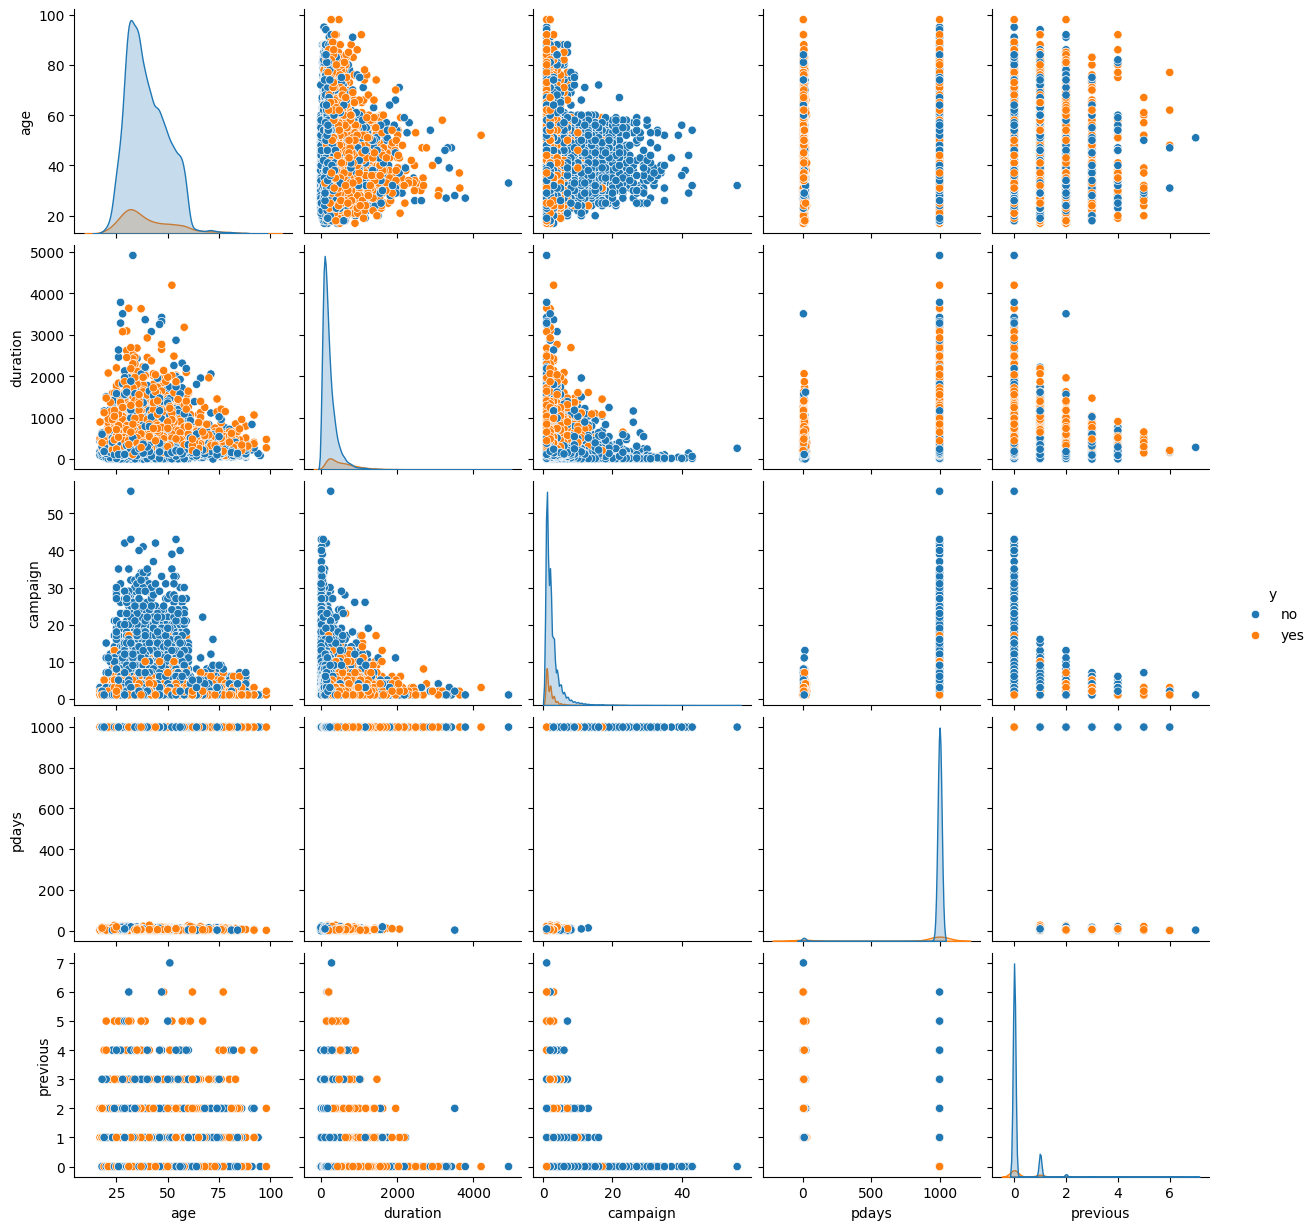

Batch 2: Columns ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y']


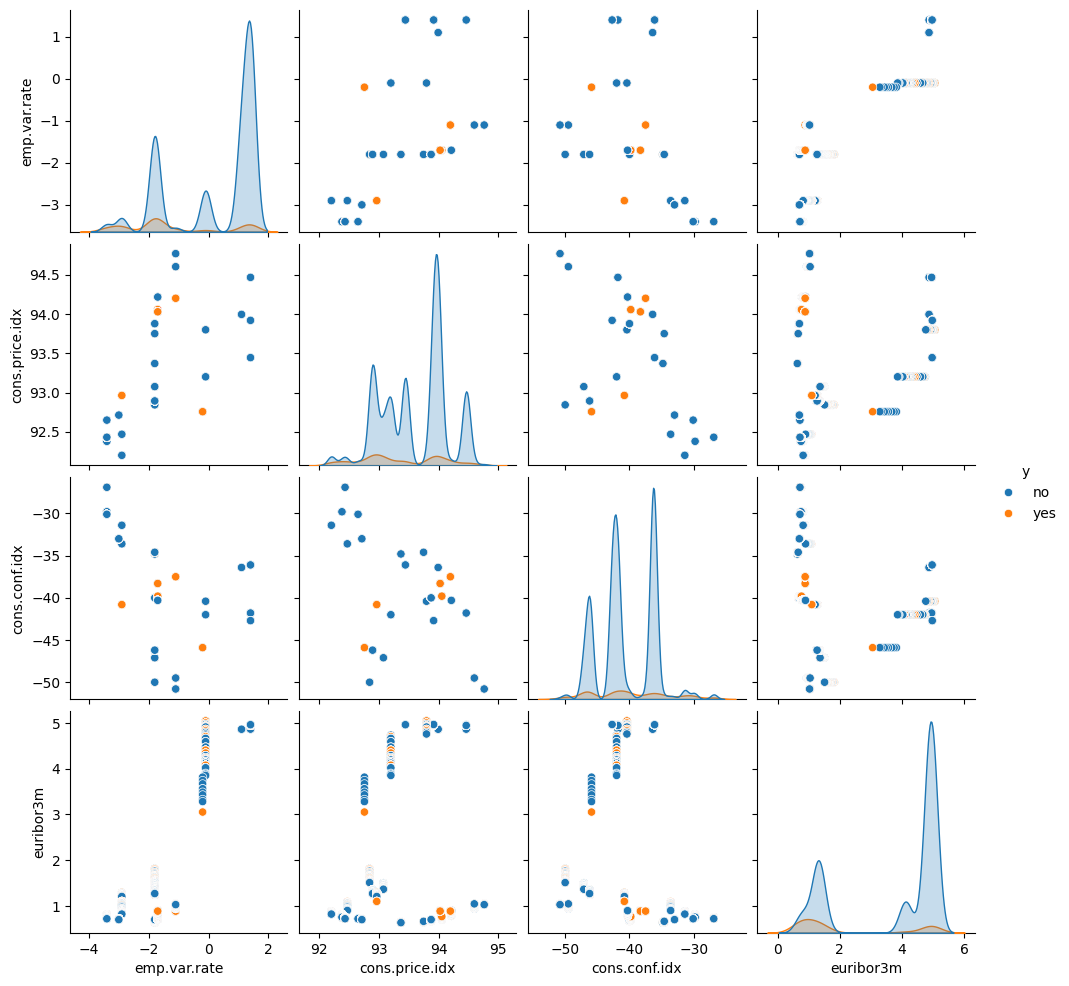

In [94]:
columns = raw_df.select_dtypes(include=["int", "float"]).columns[:-1]  # All columns except the last one
num_columns = len(columns)
batch_size = 5

# Loop through the columns in batches of 5
for i in range((num_columns + batch_size - 1) // batch_size):
    start = i * batch_size
    end = min(start + batch_size, num_columns)  # Ensure the end index is within bounds
    selected_columns = list(columns[start:end]) + ['y']  # Ensure list is not empty and includes the target column

    # Debug print to check selected columns
    print(f"Batch {i+1}: Columns {selected_columns}")

    # Check if the list is not empty before plotting
    if len(selected_columns) > 1:  # More than one column (features + target)
        sns.pairplot(raw_df[selected_columns], hue='y')
        plt.show()
    else:
        print(f"Skipping batch {i+1}: Not enough columns to plot.")

The graphs were not really informative, but we can clearly see there is no linear distribution of target classes in data.
But in some cases we can see that target data hase some specific location eg in capaign/duration age/duration we see taget is located more to the middle of the data distibution even though the points are not clearly separated

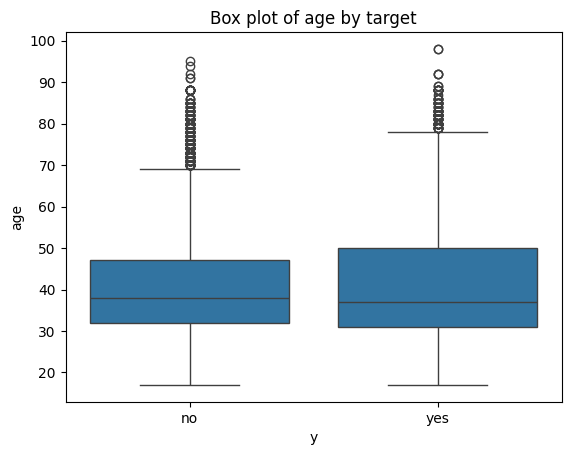

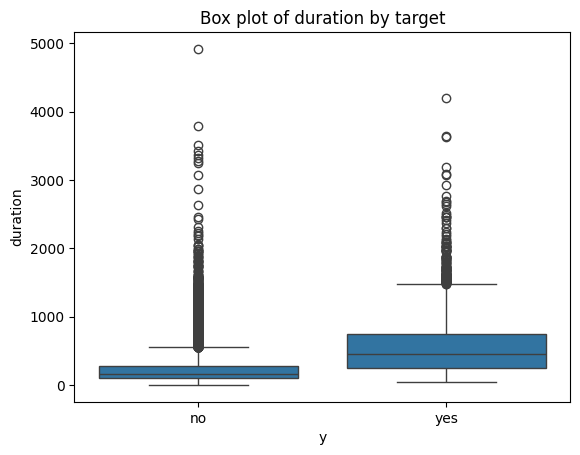

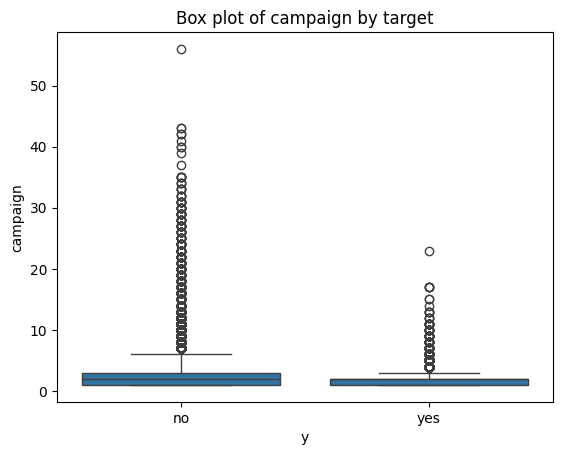

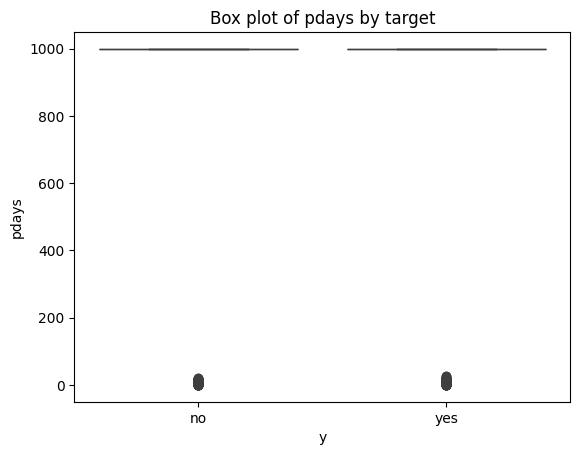

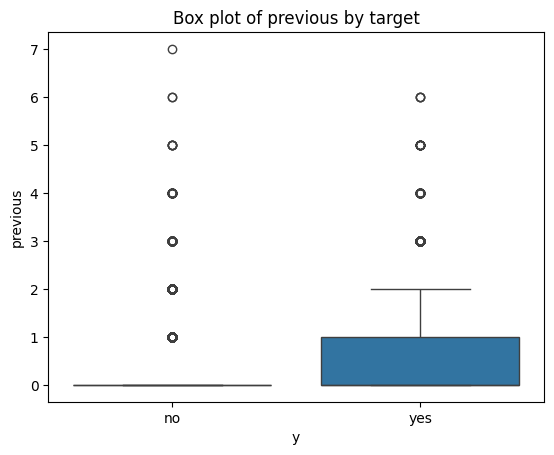

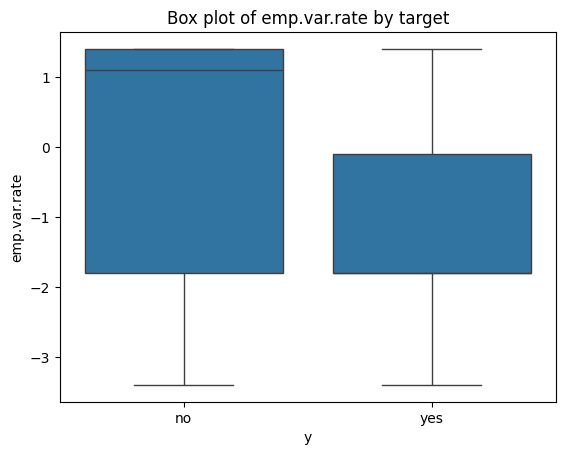

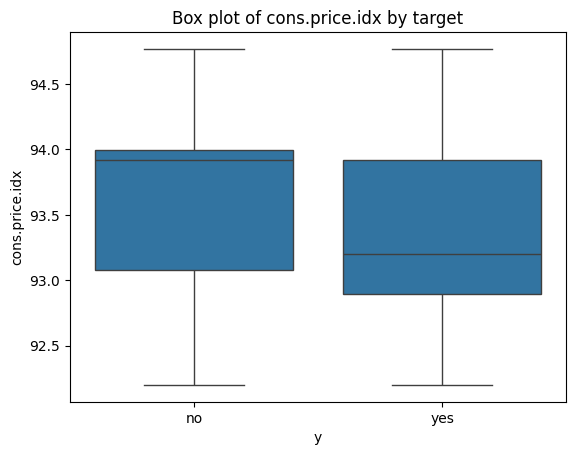

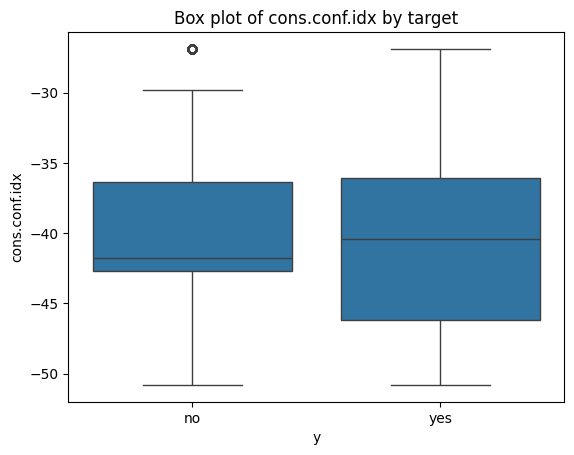

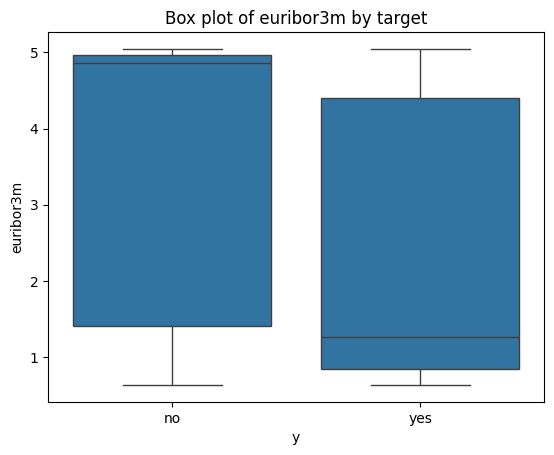

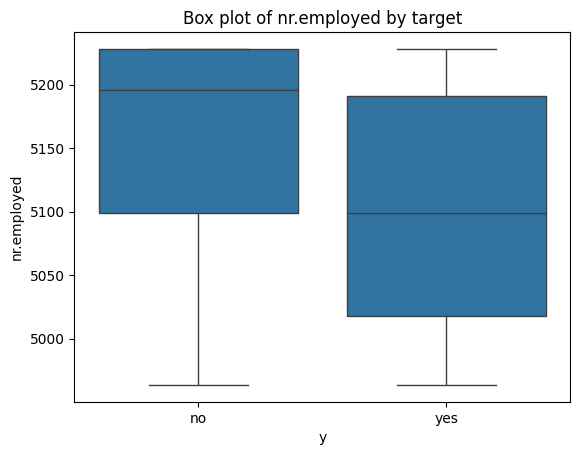

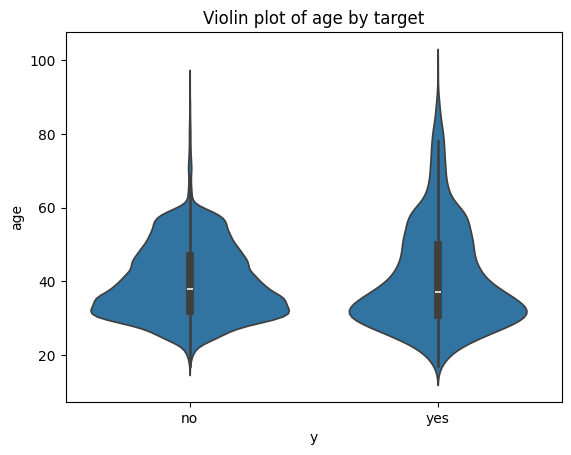

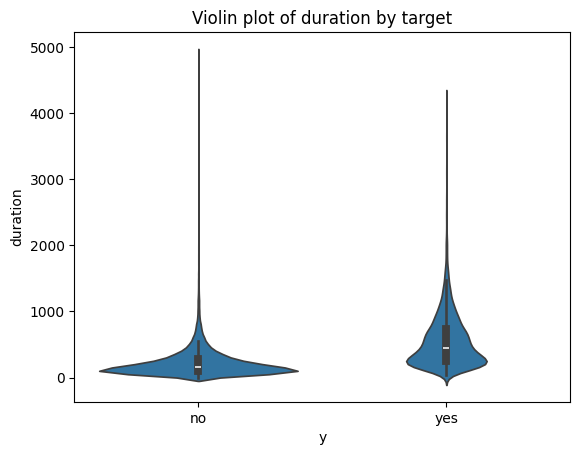

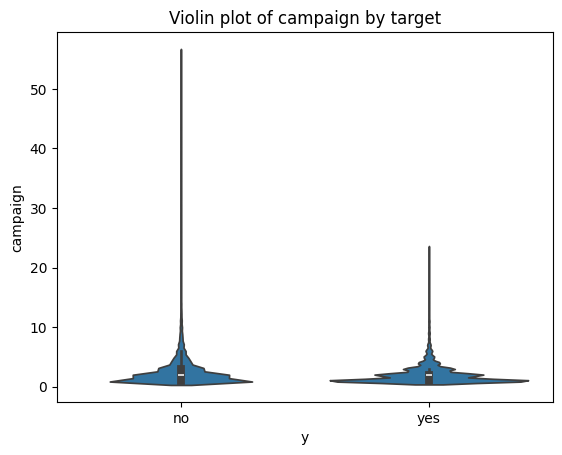

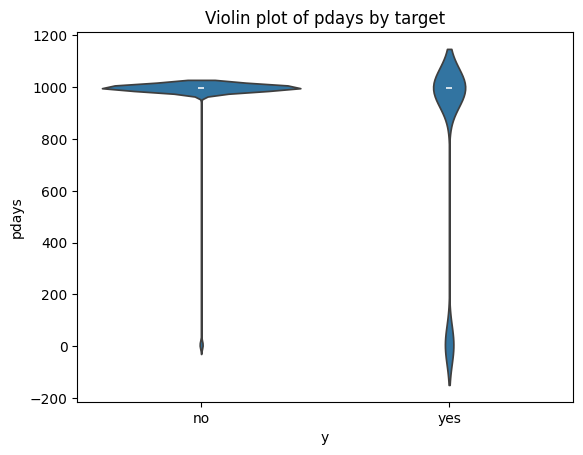

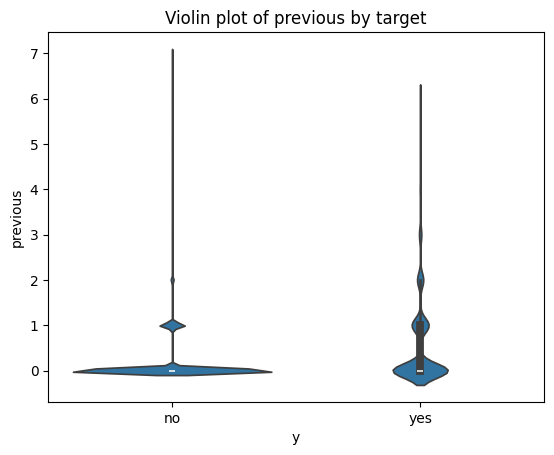

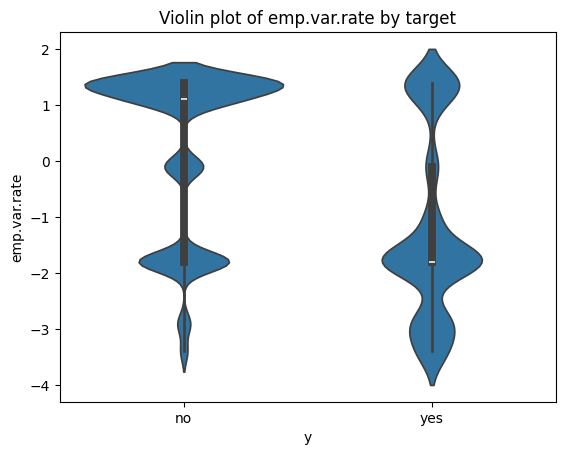

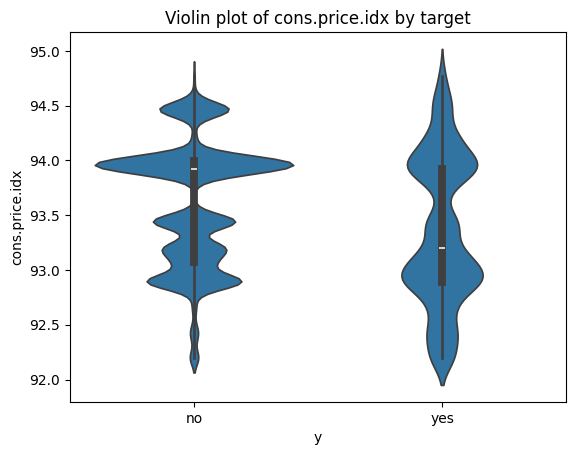

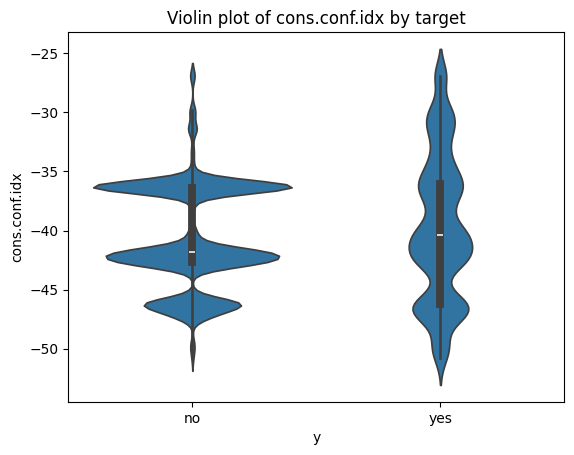

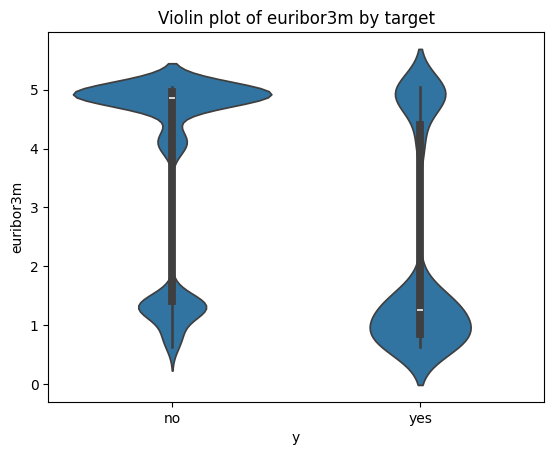

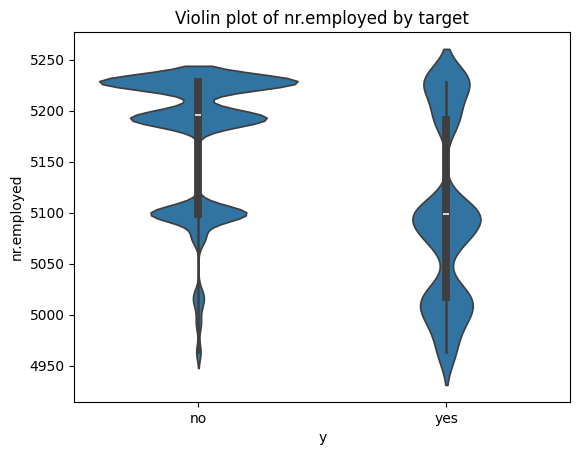

In [97]:
# Box plots
for column in raw_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x='y', y=column, data=raw_df)
    plt.title(f'Box plot of {column} by target')
    plt.show()

# Violin plots
for column in raw_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.violinplot(x='y', y=column, data=raw_df)
    plt.title(f'Violin plot of {column} by target')
    plt.show()


I don't see here some crazy outliers, so i am not planning to do anything about the outliers in this case

# Results

From the previous analysis we cam say there is certain corelation between some of the columns(after carefull invsitigations most of those columns have logical connections, and the correlation is pretty obvious), we have no empty cells and we can see the data distibuition in some cases is pretty skewed.

The important things that needs to be done, before training are:
 - eliminate tagret class imbalance
 - encode all the categorical colmuns
 - maybe ill try transofrm data to eliminate the skewness in some cases.
 - maybe will add some additional colmuns for empty values of important features

# Preprocessing

In [3]:
raw_df.select_dtypes(include=['object']).nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTENC

def encode_cat(df, categorical_cols):
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

    encoded_features = ohe.fit_transform(df[categorical_cols])
    new_columns_names = ohe.get_feature_names_out(categorical_cols)
    
    df_encoded = pd.DataFrame(encoded_features, columns=new_columns_names)
    df_no_cat = df.drop(columns=categorical_cols)

    df_combined = pd.concat([df_no_cat, df_encoded], axis=1).drop(columns=["index"])
        
    return df_combined, ohe

def encode_target(df, target_col):
    df[target_col] = df[target_col].apply(lambda x: 1 if x == "yes" else 0)
    
    return df

categorical_cols = raw_df.select_dtypes(include=["object"]).columns.drop("y")
raw_df = encode_target(raw_df, "y")

In [80]:
from imblearn.over_sampling import SMOTENC

oversampler = SMOTENC(random_state=42, categorical_features=categorical_cols.to_list(), n_jobs=-1)

X_smotenc = raw_df.drop(columns=["y"])
y_smotenc = raw_df["y"]

resampled_x, resampled_y = oversampler.fit_resample(X_smotenc, y_smotenc)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:645: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [84]:
encoded_x, cat_encoder = encode_cat(resampled_x, categorical_cols)

display(encoded_x) 
display(resampled_y)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857000,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857000,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857000,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857000,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857000,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73069,51,1751,3,999,0,1.1,93.994,-36.4,4.855808,5191.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
73070,34,373,1,999,0,-3.4,92.431,-26.9,0.740101,5017.5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
73071,31,582,1,999,0,1.4,93.918,-42.7,4.963000,5228.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
73072,49,762,1,999,0,1.4,93.918,-42.7,4.963000,5228.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


0        0
1        0
2        0
3        0
4        0
        ..
73069    1
73070    1
73071    1
73072    1
73073    1
Name: y, Length: 73074, dtype: int64

In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

poly_x = poly.fit_transform(encoded_x)

x_data = pd.DataFrame(poly_x, columns=poly.get_feature_names_out(encoded_x.columns.to_list()))

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_data, resampled_y, test_size=0.2)

# Training

In [92]:
from sklearn.metrics import roc_auc_score

## Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, penalty="l2", n_jobs=-1)

log_reg.fit(x_train, y_train)

log_reg_trian_proba = log_reg.predict_proba(x_train)
log_reg_val_proba   = log_reg.predict_proba(x_val)

print("AUROC Train:", roc_auc_score(y_train,log_reg_trian_proba[:, -1]))
print("AUROC Validation:", roc_auc_score(y_val,log_reg_val_proba[:, -1]))

0.02s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.05s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.02s - Debugger warning: It seems that frozen modules are being used, which may
0

AUROC Train: 0.9256884055432455
AUROC Validation: 0.9279571308174922


## kNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

knn.fit(x_train, y_train)

knn_trian_proba = knn.predict_proba(x_train)
knn_val_proba   = knn.predict_proba(x_val)

print("AUROC Train:", roc_auc_score(y_train,knn_trian_proba[:, -1]))
print("AUROC Validation:", roc_auc_score(y_val,knn_val_proba[:, -1]))

AUROC Train: 0.9795192838546813
AUROC Validation: 0.9371653525611011


## Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42, max_leaf_nodes=150)

tree.fit(x_train, y_train)

tree_trian_proba = tree.predict_proba(x_train)
tree_val_proba   = tree.predict_proba(x_val)

print("AUROC Train:", roc_auc_score(y_train,tree_trian_proba[:, -1]))
print("AUROC Validation:", roc_auc_score(y_val,tree_val_proba[:, -1]))

AUROC Train: 0.9655759223281372
AUROC Validation: 0.9612768704934919


## XGBoost

In [103]:
from xgboost import XGBClassifier

boost = XGBClassifier(random_state=42, n_jobs=-1)

boost.fit(x_train, y_train)

boost_trian_proba = boost.predict_proba(x_train)
boost_val_proba   = boost.predict_proba(x_val)

print("AUROC Train:", roc_auc_score(y_train,boost_trian_proba[:, -1]))
print("AUROC Validation:", roc_auc_score(y_val,boost_val_proba[:, -1]))

AUROC Train: 0.9923983657532562
AUROC Validation: 0.9822913662327933
